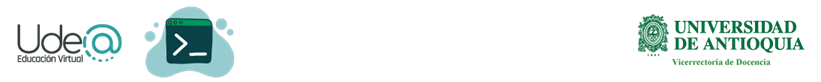

## Tratamiento de Señales III - Laboratorio 1

**Autores:**  

*   Hernán Felipe García Arias, PhD.
*   Pablo Alejandro Alvarado Durán, PhD.
*   Cristian David Ríos Urrego, MSc.
*   Diana Patricia Tobon Vallejo, PhD.

**Facultad de Ingeniería**

**Universidad de Antioquia**


---

## Metodología general en un sistema de análisis de patrones

![Image 1](https://existek3-838c.kxcdn.com/wp-content/uploads/2018/12/deep-learning-vs-machine-learning-machine-learning-scheme-.webp)

Fuente: https://existek.com/blog/deep-learning-vs-machine-learning/

## Etapa 1. Adquisición de datos

Etapa donde se obtiene la información necesaria que luego será procesada y analizada para identificar patrones significativos. En esta fase, se recopilan datos brutos de diversas fuentes, y es crucial garantizar la calidad, integridad y relevancia de los datos para obtener resultados precisos y confiables en el análisis de patrones.

## Etapa 2. Pre-procesamiento

Esta etapa es crucial para garantizar que los datos estén en un formato adecuado y sean aptos para el análisis. Algunas tareas comunes que se realizan en esta etapa son: limpieza de datos, normalización y estandarización, filtrado de datos, división de datos, manejo de ruido, etc.

## Etapa 3. Extracción de caracteristicas

En esta etapa se extraen las variables o atributos más relevantes de los datos para representar de manera efectiva los patrones que buscan modelar el fenómeno de interés. Estas características se utilizan luego como entrada para algoritmos de análisis de patrones. Posterior a la extracción de características, algunas tareas comunes que se realizan son: selección de características, transformación de características, reducción de dimensionalidad, etc.

## Etapa 4. Clasificación/Regresión

En esta etapa es donde se aplican modelos para asignar etiquetas a los datos o predecir valores numéricos. Estos modelos se entrenan utilizando las características seleccionadas durante las etapas anteriores del proceso.

<b>Clasificación</b>: es una tarea en la que el objetivo es asignar una etiqueta (o clase) a un conjunto de datos. Estas etiquetas suelen ser categorías predefinidas.

<b>Regresión</b>: es una tarea en la que el objetivo es predecir un valor numérico. Se utiliza cuando la variable objetivo es continua en lugar de discreta.

## Etapa 5. Medidas de desempeño

Esta etapa se refiere a la evaluación y cuantificación del rendimiento del modelo o algoritmo implementado durante las fases anteriores. Esta etapa es crucial para comprender qué tan bien está funcionando el sistema y si cumple con los objetivos establecidos. Algunas medidas de desempeño comunes son: exactitud (accuracy), precisión (precision), sensibilidad (recall), f1-score, etc.

------
------
------

# Etapa 2. Pre-procesamiento

---

# Normalización o Estandarización

La normalización o estandarización de señales es fundamental en el procesamiento de datos, ya que asegura que todas las señales, independientemente de su naturaleza o magnitud, se encuentren en un rango común o tengan propiedades estadísticas consistentes. Esto es crucial para garantizar que los algoritmos de aprendizaje automático, análisis de patrones, o cualquier modelo subsecuente, puedan interpretar las señales de manera equitativa y eficiente, sin que una señal domine a las demás debido a diferencias en escala o rango. Además, este preprocesamiento ayuda a mejorar la estabilidad numérica y la convergencia de los modelos, optimizando su rendimiento y precisión. Al aplicar estas técnicas a señales como voz, imágenes, o datos de sensores, se logra una representación más robusta y uniforme de los datos, facilitando un análisis más efectivo y resultados más confiables.








## Normalización Señal de voz

Es común normalizar la amplitud de las señales de voz para que los valores oscilen dentro de un rango determinado, generalmente entre -1 y 1. Esto asegura que todas las señales tengan la misma escala y ayuda a evitar saturación o pérdida de información en los procesos posteriores.


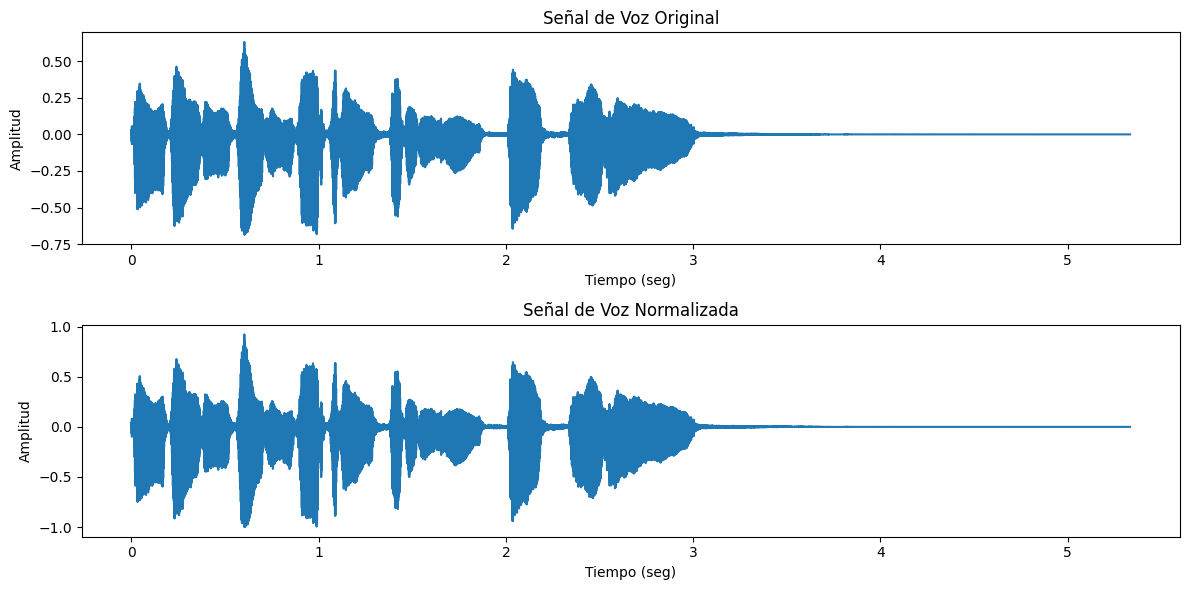

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Cargar una señal de voz desde un archivo de ejemplo en librosa
signal, sampling_rate = librosa.load(librosa.example('trumpet'), sr=None)

# Crear el vector de tiempo
time = np.arange(len(signal)) / sampling_rate

# Normalizar la señal de voz a rango [-1, 1]
signal_normalized = signal / np.max(np.abs(signal))

# Graficar la señal original y la normalizada
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Señal de Voz Original')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(time, signal_normalized)
plt.title('Señal de Voz Normalizada')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

## Normalización en Imagenes

Para imágenes, una práctica común es normalizar los valores de los píxeles para que estén en un rango entre 0 y 1 o entre -1 y 1. Esto se hace dividiendo los valores de los píxeles por 255 si los valores originales están en un rango de 0 a 255.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


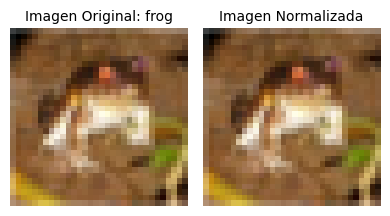

In [2]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Diccionario de etiquetas de CIFAR-10
labels_dict = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat',
    4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

# Tomar la primera imagen y su etiqueta del conjunto de entrenamiento
image = x_train[0]
label = y_train[0][0]
label_name = labels_dict[label]

# Normalizar la imagen a rango [0, 1]
image_normalized = image / 255.0

# Graficar la imagen original y la normalizada con su etiqueta
plt.figure(figsize=(4, 3))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f'Imagen Original: {label_name}', fontsize=10)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_normalized)
plt.title('Imagen Normalizada', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.show()

## Normalización de señales obtenidas de sensores (Acelerómetros, EEG, ECG, etc):
Similar a las señales de voz, es común normalizar las señales de sensores para que los valores caigan dentro de un rango específico, por ejemplo, entre 0 y 1. Este proceso se lleva a cabo mediante una normalización min-max, utilizando la siguiente fórmula:

$x' = \frac{x - \min(x)}{\max(x) - \min(x)}$

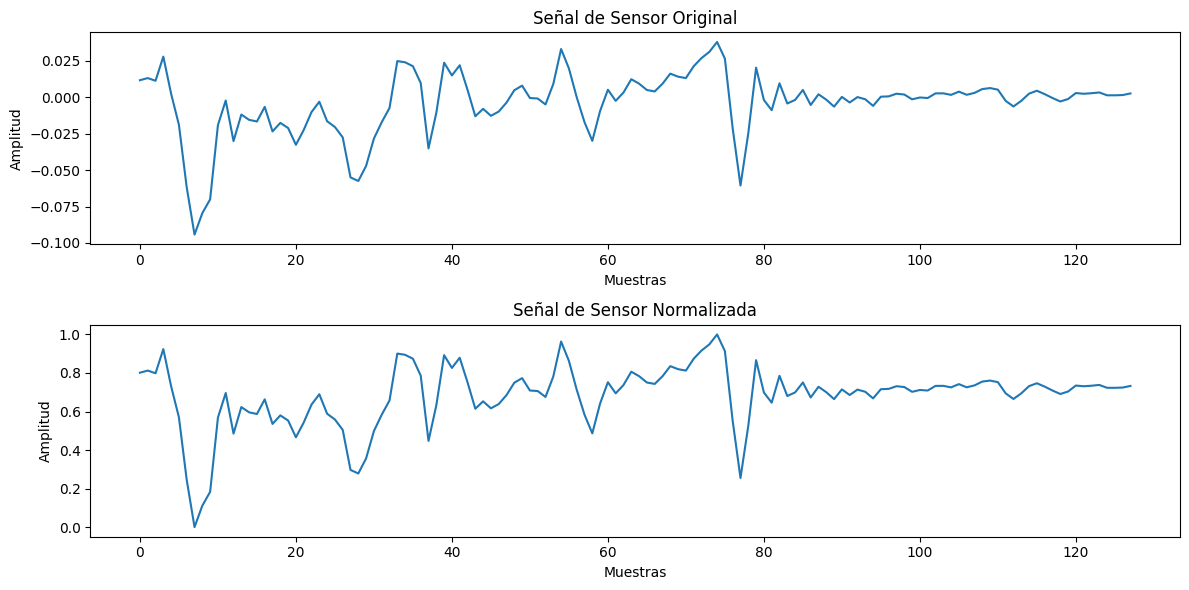

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import zipfile
import io
import os

# Descargar y descomprimir el dataset UCI HAR desde la web
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Cargar la señal de acelerómetro (body_acc_x_test.txt) desde el dataset UCI HAR
data_path = 'UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt'
sensor_signal = pd.read_csv(data_path, delim_whitespace=True, header=None).values

# Seleccionar la primera señal (una muestra de una persona)
signal = sensor_signal[0]

# Normalizar la señal del sensor a rango [0, 1]
signal_min = np.min(signal)
signal_max = np.max(signal)
sensor_signal_normalized = (signal - signal_min) / (signal_max - signal_min)

# Graficar la señal original y la normalizada
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Señal de Sensor Original')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(sensor_signal_normalized)
plt.title('Señal de Sensor Normalizada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# Enventanado y Segmentacion



# Señales estacionarias y no estacionarias

- En las señales estacionarias, las propiedades de los datos $y(x)$ no dependen del dominio de entrada $x$ (tiempo, variables espaciales).

- Por otro lado, una señal $y(x)$ es no-estacionaria si alguna de sus propiedades depende de la variable de entrada $x$.

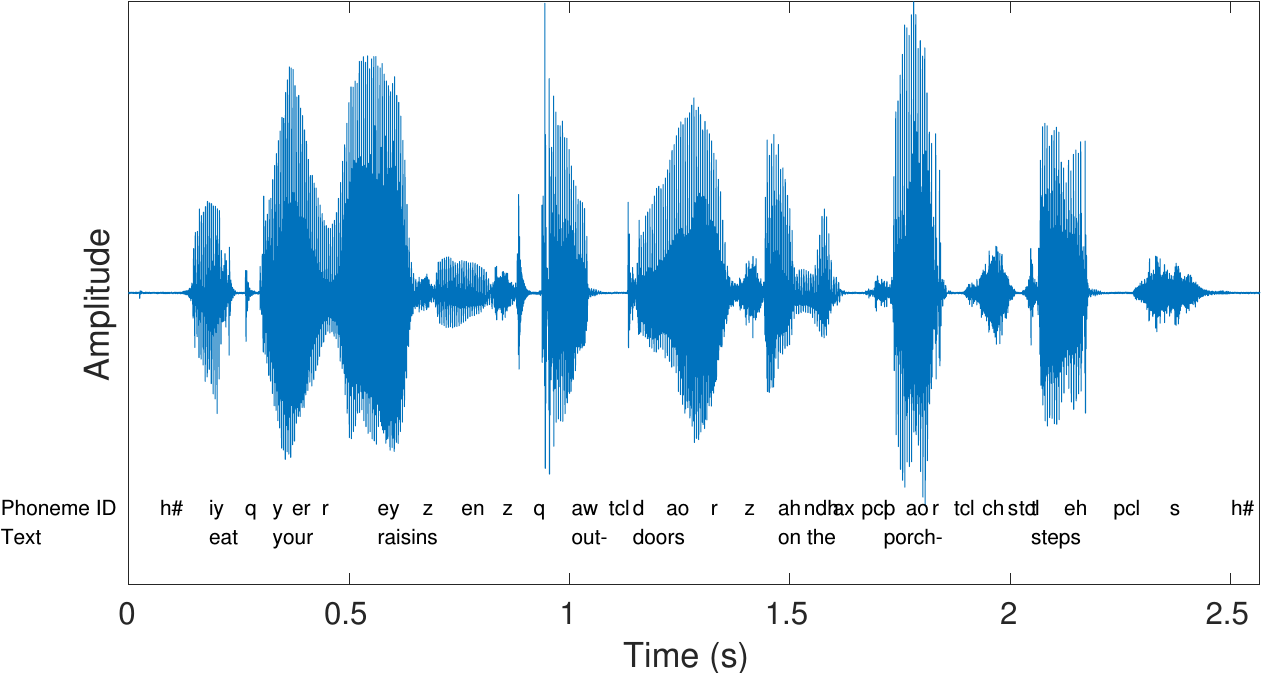


Fuente: https://wiki.aalto.fi/download/attachments/148294912/sample_sentence-1.png?version=1&modificationDate=1552659089307&api=v2

## Ejemplos de señales no estacionarias:

https://otexts.com/fpp2/stationarity.html

# Enventanado

- La creación de ventanas es un método clásico en el procesamiento de señales y se refiere a dividir la señal de entrada en segmentos temporales.

- Los bordes de los segmentos son entonces visibles como discontinuidades.

- Para reducir el impacto de la segmentación en las propiedades estadísticas de la señal, aplicamos ventanas.

- Las funciones de ventana son funciones suaves que van a cero en los bordes (menos la rectangular).

- Al multiplicar la señal de entrada con una función de ventana, la función de ventana también llega a cero en el borde, de modo que la discontinuidad en el borde se vuelve invisible.

- La ventana cambia la señal, pero el cambio está diseñado de tal manera que se minimiza su efecto en las estadísticas de la señal.

Debemos tener en cuenta que existen dos aplicaciones distintas de ventanas con diferentes requisitos:
1. **Análisis:** En el análisis, solo nos preocupamos por extraer información.

2. **Procesamiento:** Mientras que en las aplicaciones de procesamiento, además, necesitamos la capacidad de recrear la señal a partir de una secuencia de ventanas.

A continuación se muestran algunas de las ventanas mas utilizadas en el procesamiento de señales

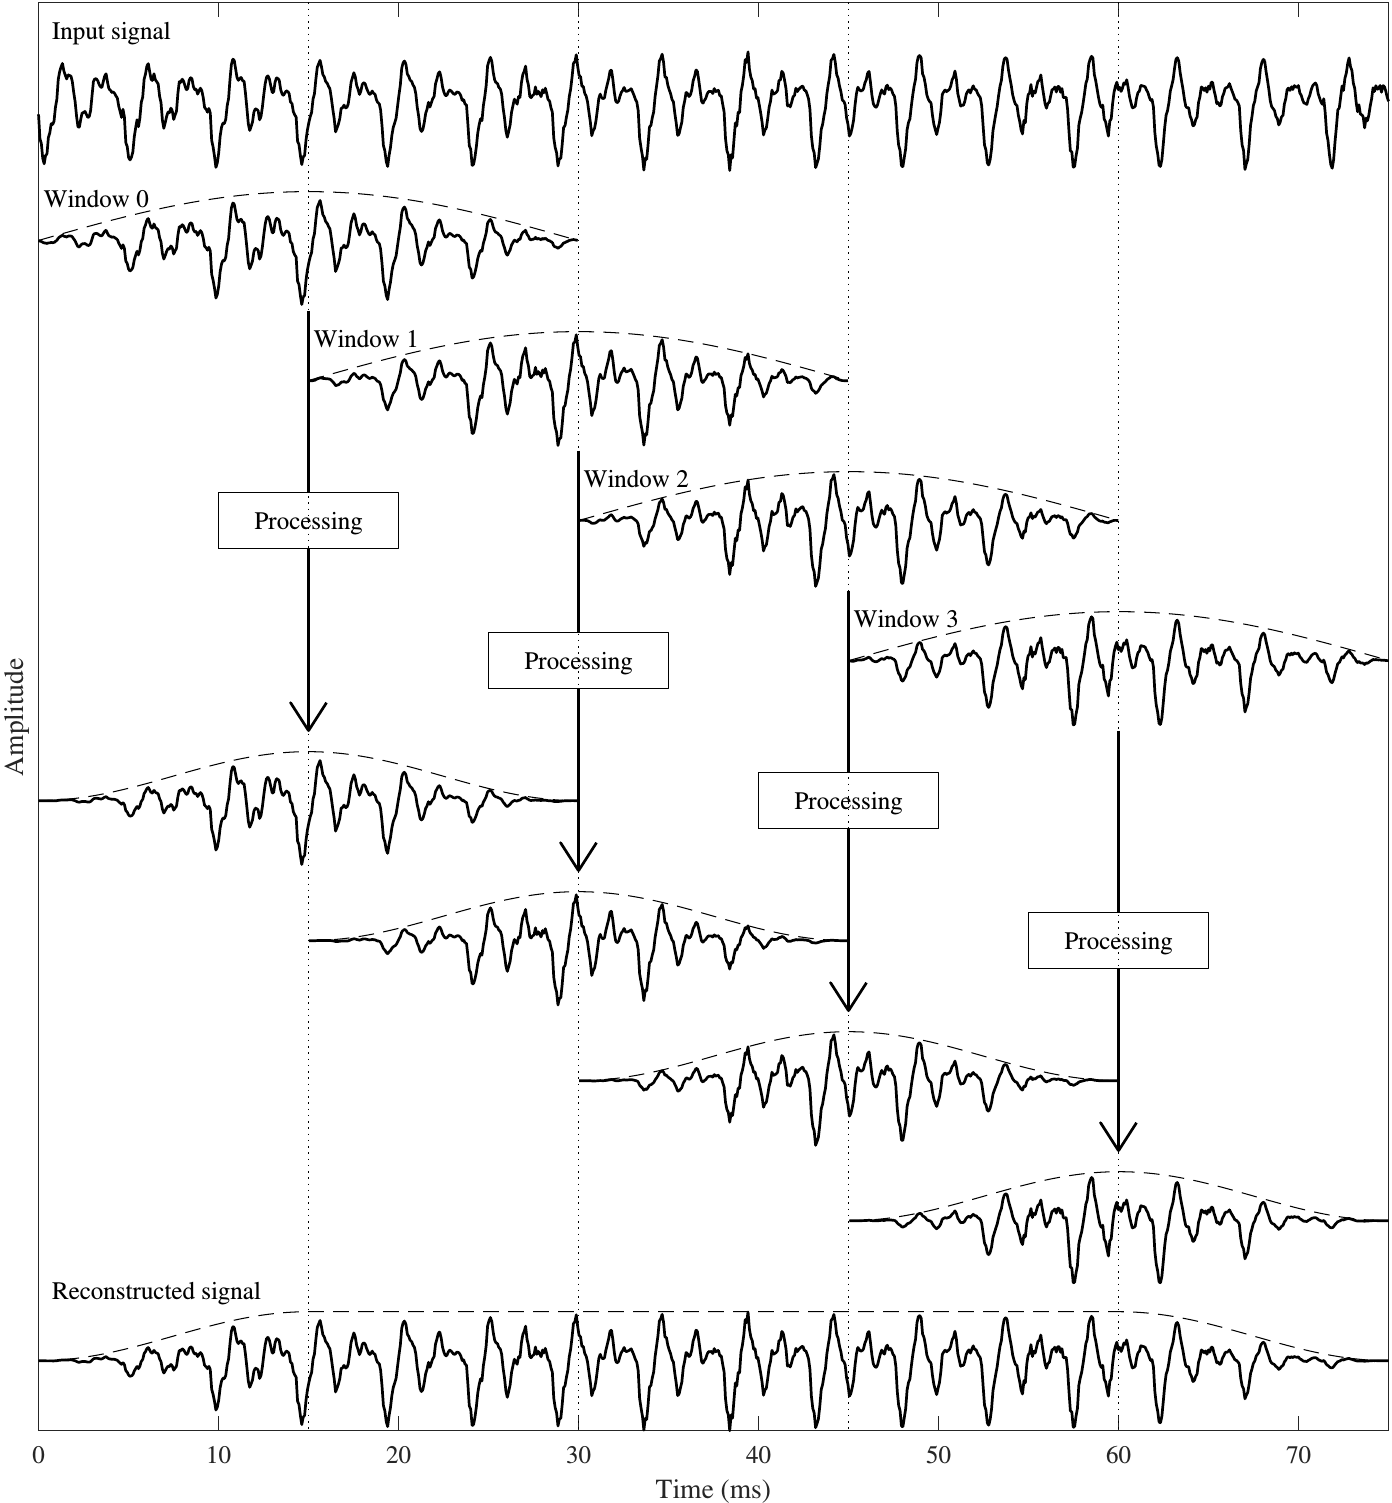

Fuente: https://speechprocessingbook.aalto.fi/Representations/Windowing.html

## Tipos de ventanas

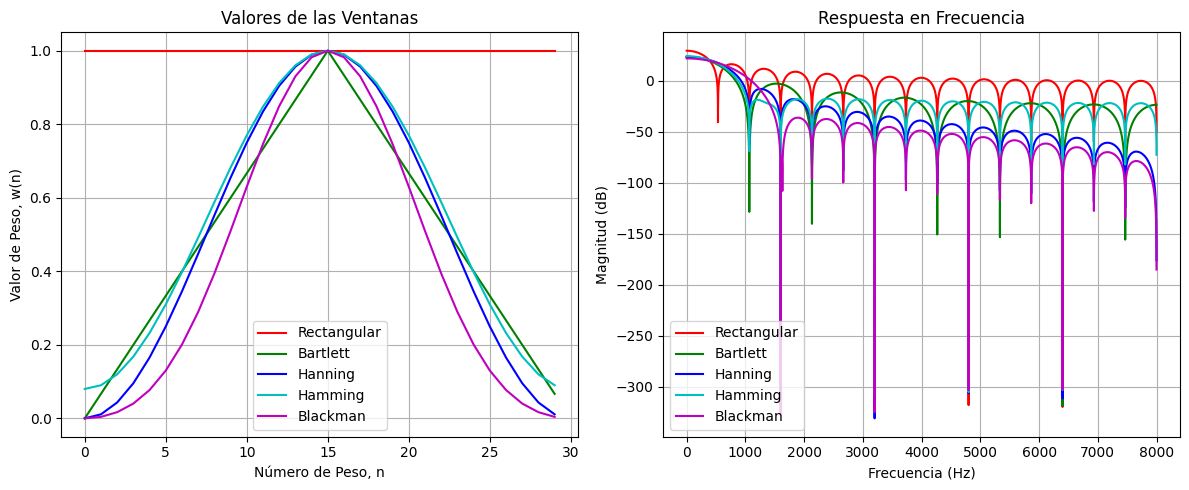

In [4]:
import scipy.signal as signal

# Definir los parámetros
N = 30
fs = 16000

# Crear las ventanas
windows = ['boxcar', 'bartlett', 'hann', 'hamming', 'blackman']
colors = ['r', 'g', 'b', 'c', 'm']
labels = ['Rectangular', 'Bartlett', 'Hanning', 'Hamming', 'Blackman']

# Preparar la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficar los valores de las ventanas
for window, color, label in zip(windows, colors, labels):
    w = signal.get_window(window, N, fftbins=True)
    ax1.plot(w, color=color, label=label)

ax1.set_title('Valores de las Ventanas')
ax1.set_xlabel('Número de Peso, n')
ax1.set_ylabel('Valor de Peso, w(n)')
ax1.legend()
ax1.grid()

# Graficar la respuesta en frecuencia de las ventanas
for window, color, label in zip(windows, colors, labels):
    w = signal.get_window(window, N, fftbins=True)
    freq, response = signal.freqz(w, worN=fs)
    response = 20 * np.log10(np.abs(response))
    ax2.plot(freq * fs / (2 * np.pi), response, color=color, label=label)

ax2.set_title('Respuesta en Frecuencia')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Magnitud (dB)')
#ax2.axis(xmin=0,xmax=3000)
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

Aplicar ventanas en el análisis de señales ayuda a reducir la fuga espectral y mejorar la resolución en el dominio de frecuencia. La ventana rectangular es simple pero puede introducir alta fuga espectral. Las ventanas de Hamming y Hanning ofrecen un equilibrio entre reducción de fuga y resolución espectral, con Hamming proporcionando una atenuación ligeramente mejor de los lobos laterales. La ventana de Blackman reduce significativamente los lobos laterales a costa de una resolución espectral menor, mientras que la ventana de Bartlett, con su forma triangular, ofrece una reducción moderada de la fuga y una resolución bastante buena. La elección de la ventana depende de si se prioriza la reducción de fuga o la resolución espectral en el análisis.

---
## **Trabajo de laboratorio:**

1. Descargue las siguientes señales de audio, y establezca la frecuencia de muestreo y número de datos:

*   !wget 'https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/C4.wav'
*   !wget 'https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/D5.wav'
*   !wget 'https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/G4.wav'


In [5]:
import matplotlib.pyplot as plt
import soundfile as sf

!wget 'https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/G4.wav'

data, samplerate = sf.read('G4.wav')
print(samplerate)

--2024-08-12 18:10:24--  https://www.osaka-kyoiku.ac.jp/~masako/exp/kichu/urawaza/G4.wav
Resolving www.osaka-kyoiku.ac.jp (www.osaka-kyoiku.ac.jp)... 150.86.250.13, 2001:2f8:1015:fa::d
Connecting to www.osaka-kyoiku.ac.jp (www.osaka-kyoiku.ac.jp)|150.86.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345858 (338K) [audio/x-wav]
Saving to: ‘G4.wav’

G4.wav              100%[===================>] 337.75K   573KB/s    in 0.6s    

2024-08-12 18:10:25 (573 KB/s) - ‘G4.wav’ saved [345858/345858]

22050


2. Normalice y visualice las señales de audio en dos gráficas, una que muestre la señal completa, y otra que muestre la señal en una ventana de 50 milisegundos, ¿qué propiedades presentan los datos observados? ¿podría decirse que estas señales son estacionarias?.

3. Escriba una función que realice la segmentación (enventanado) de una señal de longitud N y frecuencia de muestreo $f_s$, utilizando ventanas de longitud L y traslape P . La función debe permitir escoger entre cuatro tipos de ventanas, incluyendo las ventanas Rectangular, y Hann. Para cada ventana, muestre en una gráfica alguno de los segmentos obtenidos. ¿Qué puede concluir de estos resultados?

4. Genere una función que reciba la señal enventanada (matriz) y entregue la reconstrucción de la señal inicial (vector). Para este propósito tenga en cuenta la suma, traslape y concatenación de cada segmento contenido en la matriz de entrada. Muestre una gráfica la señal reconstruida junto con la original. Describa los resultados.

5. Finalmente, evalúe la exactitud de la señal reconstruida, utilizando como métrica el coeficiente de correlación. Documéntese de este coeficiente y compare la señal original con la señal reconstruida. ¿Qué ventana obtiene mayor similitud? ¿Porqué?